#**Rotina de análise da Matriz Energética Brasileira**

O script vai realizar uma análise detalhada dos bancos de dados retirados de "data worldbank" e gerar gráficos explicativos, um relatório e enviará um email com estes compílados a quem interesse.

Bancos de dados utilizados:

https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2018&start=1960&view=chart

https://data.worldbank.org/indicator/EN.ATM.METH.KT.CE?view=chart

https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC?view=chart

https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE?view=chart

******https://data.worldbank.org/indicator

In [94]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [96]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from pathlib import Path


In [97]:
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2017.20180305-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree    

In [98]:
# Instala pacotes de barra de progresso, para melhor visualização do progresso do script
#!pip install tqdm
#!pip install progressbar

In [99]:
# importa o pacote de barra de progresso, para melhor visualização do progresso do script
from tqdm import tqdm

In [100]:
!pip install pdf2image
!pip install poppler-utils
!pip install python-dateutil

!sudo apt-get install -y poppler-utils
!pip install --upgrade pdf2image 
from pdf2image import convert_from_path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:

from pdflatex import PDFLaTeX
import pdflatex

from pdf2image import convert_from_path
from pdf2image.exceptions import (
PDFInfoNotInstalledError,
PDFPageCountError,
PDFSyntaxError
)

from IPython.display import display, Image



##**Biblioteca de Funções**

In [102]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=4, decimal='.')
  return df

In [103]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**Imputs do Script**

In [104]:
# Nome dos bancos de dados:
BD_POP = 'API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv'
BD_CO2 = 'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3731558.csv'
BD_MET = 'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3733252.csv'
BD_NOX = 'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_3733279.csv'
BD_EPC = 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv' # Eletric Power Consumpion per Capita (KWh)
BD_REC = 'API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3753692.csv'

# Nome da pasta que estão os Bancos de Dados (BDs):
bd_local = '/content/drive/MyDrive/..Python_Codes/Projeto_Dashboard_Matriz_Energetica/BD'

In [105]:
##rascunho,
# dfr = ler_csv(BD_POP)
# dfr

In [106]:
#rascunho
# indexBR = dfr.index[dfr['Country Name'] == 'Aruba']   # find BR index
# n = indexBR[0]
# df = dfr.iloc[n,:]
# df 

##**Rotina de Execução**

In [107]:
# Lista de bancos de dados:
BD_list = [BD_POP,BD_CO2,BD_MET,BD_NOX,BD_EPC,BD_REC]
BD_df_list = []

for n in tqdm(BD_list):
  df = ler_csv(n)                                        # le o banco de dados respectivo
  indexBR = df.index[df['Country Name'] == 'Brazil'][0]  # encontra o index referente ao brasil
  df_BRtrat = pd.DataFrame(df.iloc[indexBR, :])          # separa a linha de dados do brasil em um dataframe separado
  df_BRtrat = df_BRtrat.transpose()                      # transpõe o dataframe para facilitara a visualização
  BD_df_list.append(df_BRtrat)                           # adiciona o dataframe criado à uma lista 


df = pd.DataFrame(BD_df_list[0])                      # inicia um dataframe único
for n in range(1, len(BD_df_list)):                   # laço de mesclagem dos bancos de dados
  df = pd.merge(df , BD_df_list[n], how = 'outer')    # mesclagem dos bancos de dados


df.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Indicator Code',  axis='columns', inplace=True)  # remove colunas desnecessárias
df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização

new_header = df.iloc[0]                                   #grab the first row for the header
df = df[1:]                                               #take the data less the header row
df.columns = new_header                                   #set the header row as the df header

df                                                        # imprime a tabela/dataframe gerado(a)



100%|██████████| 6/6 [00:00<00:00, 35.28it/s]


Indicator Name,"Population, total",CO2 emissions (metric tons per capita),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Electric power consumption (kWh per capita),Renewable energy consumption (% of total final energy consumption)
1960,72179235.0,0.649886,NaN,NaN,NaN,NaN
1961,74311338.0,0.662131,NaN,NaN,NaN,NaN
1962,76514329.0,0.701775,NaN,NaN,NaN,NaN
1963,78772647.0,0.70605,NaN,NaN,NaN,NaN
1964,81064572.0,0.699884,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017,207833825.0,2.164422,421660.0,184380.0,NaN,45.436401
2018,209469320.0,2.041874,416280.0,179200.0,NaN,47.061699
2019,211049519.0,NaN,NaN,NaN,NaN,NaN
2020,212559409.0,NaN,NaN,NaN,NaN,NaN


In [108]:
for col in df.columns:
    print(col)

Population, total
CO2 emissions (metric tons per capita)
Methane emissions (kt of CO2 equivalent)
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Electric power consumption (kWh per capita)
Renewable energy consumption (% of total final energy consumption)


## **Análise dos dados**

In [109]:
# CRIAÇÃO DE VARIÁVEIS

df['CH4 emissions (metric tons per capita)'] = 1000 * df['Methane emissions (kt of CO2 equivalent)'] / df['Population, total']
df['NO2 emissions (metric tons per capita)'] = 1000 * df['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] / df['Population, total']

df['Total Polutant emissions (metric tons per capita of CO2 equivalent)'] = df['CO2 emissions (metric tons per capita)'] +\
                                                                            df['CH4 emissions (metric tons per capita)'] +\
                                                                            df['NO2 emissions (metric tons per capita)'] 

# DOIS EIXOS Y (Especificar eixos a serem comparados)
comp1a = 'Total Polutant emissions (metric tons per capita of CO2 equivalent)'
comp1b = 'Population, total'

comp2a = 'CO2 emissions (metric tons per capita)'
comp2b = 'Population, total'

comp3a = 'CH4 emissions (metric tons per capita)'
comp3b = 'Population, total'

comp4a = 'NO2 emissions (metric tons per capita)'
comp4b = 'Population, total'

# LISTA DE COMPS
comp_list_2y = [[comp1a,comp1b],
                [comp2a,comp2b],
                [comp3a,comp3b],
                [comp4a,comp4b]]

## **Geração de Gráficos**

### **Gráficos de um eixo**

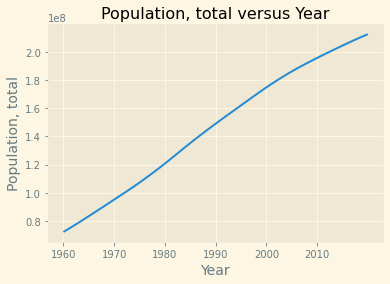

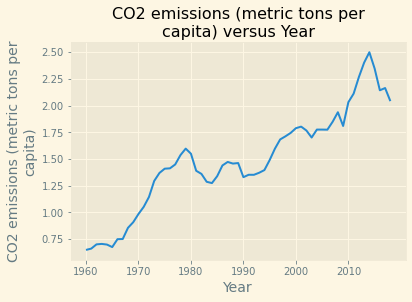

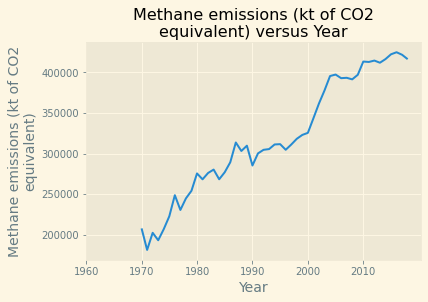

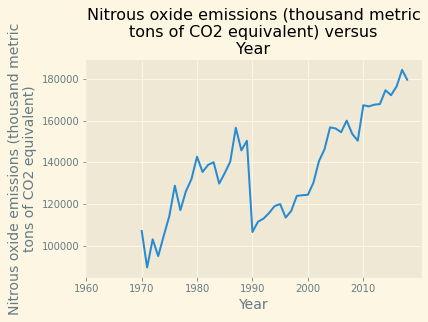

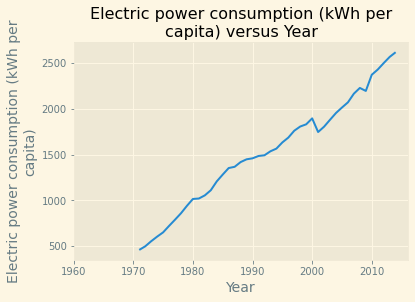

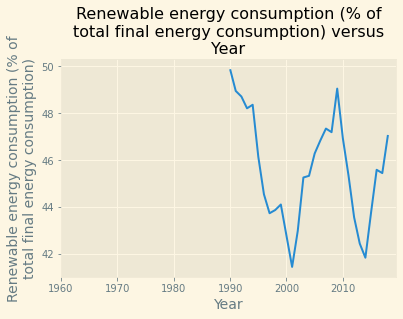

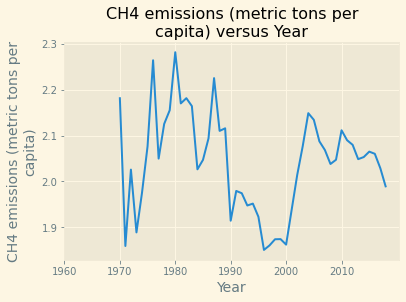

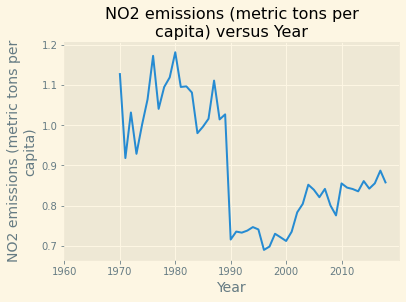

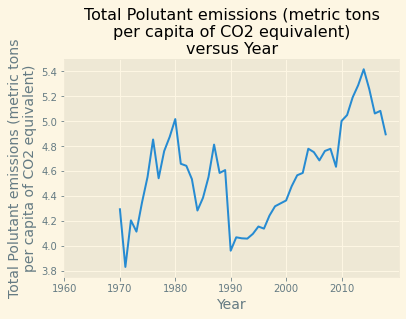

In [110]:
# copia eixo de tempo (anos):
df['ano (str)'] = df.index

# Converte eixo de tempo (string) em inteiros ou NaN:
df['ano (int)'] = pd.to_numeric(df['ano (str)'], errors='coerce').fillna(0).astype('int')
df['ano (int)'].replace(0, np.nan, inplace=True)

# Remove index NaN:
df['ano (int)'].dropna()

# Encontra os limites da faixa de valores do eixo X:
xi = df['ano (int)'][0]
xf = df['ano (int)'][-2]

# plota as Colunas do Dataframe em função do ano:
for n in df.columns:
  if ((n == 'ano (int)') | (n == 'ano (str)')) == 1:
    pass
  else:
    with plt.style.context('Solarize_Light2'):
      
      plt.plot(df['ano (int)'], df[n] , linewidth=2.0)

      plt.title(formatar_titulo(n + ' versus Year'))

      plt.xlabel('Year', fontsize=14)
      plt.ylabel( formatar_titulo(n) , fontsize=14)
      
      time_step = 10 # years
      plt.xticks(list(range(int(xi), int(xf), time_step)))  # passo de tempo

      # figure(figsize=(8, 6), dpi=300)

    img_local = bd_local.replace('/BD','/Images')
    n = n.replace(' ','_').replace('%','\%')
    plt.savefig(os.path.join( img_local , n  + '_versus_Year'), dpi=300, bbox_inches='tight')
    plt.show()


### **Gráficos de dois eixos**

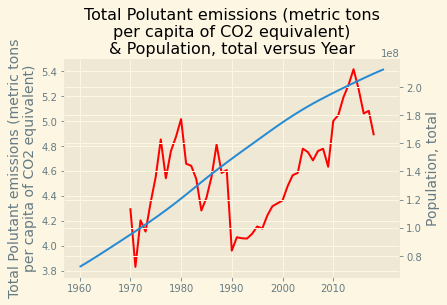

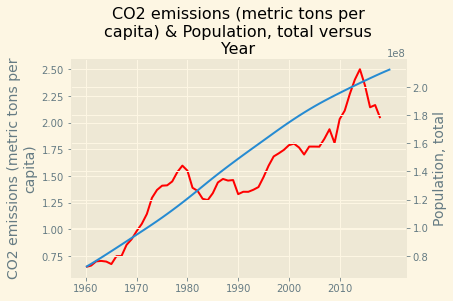

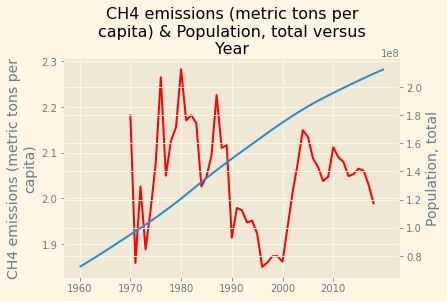

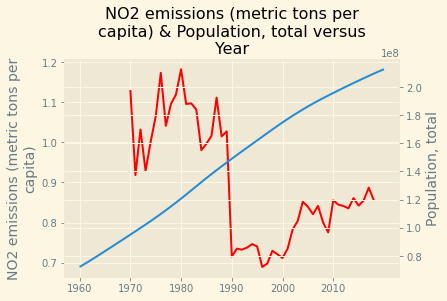

In [111]:
for i in comp_list_2y:

  # plota duas colunas do Dataframe em função do ano:
  with plt.style.context('Solarize_Light2'):

    figure, left_ax = plt.subplots()
    left_ax.plot(df['ano (int)'], df[i[0]], linewidth=2.0, color='red')
    left_ax.set_ylabel( formatar_titulo(i[0]) , fontsize=14)

    right_ax = left_ax.twinx()
    right_ax.plot(df['ano (int)'], df[i[1]], linewidth=2.0)
    right_ax.set_ylabel( formatar_titulo(i[1]) , fontsize=14)

    plt.xlabel('Year', fontsize=14)
    
    n = i[0] + ' & ' + i[1]
    
    plt.title(formatar_titulo(n + ' versus Year'))


    time_step = 10 # years
    plt.xticks(list(range(int(xi), int(xf), time_step)))  # passo de tempo

    # figure(figsize=(8, 6), dpi=300)

  img_local = bd_local.replace('/BD','/Images')
  n = n.replace(' ','_').replace('%','\%')
  plt.savefig(os.path.join( img_local , n  + '_versus_Year'), dpi=300, bbox_inches='tight')
  plt.show()


##**Geração de Relatório**

In [112]:
################## testando novo complador de latex

!pip install pylatex 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
################## testando novo complador de latex
# https://www.geeksforgeeks.org/pylatex-module-in-python/

import numpy as np
  
from pylatex import Document, Section, Subsection, Tabular
from pylatex import Math, TikZ, Axis, Plot, Figure, Matrix, Alignat
from pylatex.utils import italic
from pylatex import Command
from pylatex.utils import NoEscape
import os
  
if __name__ == '__main__':

    dir_base = '/content/drive/MyDrive/..Python_Codes/Projeto_Dashboard_Matriz_Energetica/Images/'

    dict_img = {  'image_filename01':'Population,_total_versus_Year.png' ,
                  'image_filename02':'CO2_emissions_(metric_tons_per_capita)_versus_Year.png',
                  'image_filename03':'Methane_emissions_(kt_of_CO2_equivalent)_versus_Year.png' ,
                  'image_filename04':'Nitrous_oxide_emissions_(thousand_metric_tons_of_CO2_equivalent)_versus_Year.png' ,
                  'image_filename05':'Electric_power_consumption_(kWh_per_capita)_versus_Year.png' ,
                  'image_filename06':'Renewable_energy_consumption_(\%_of_total_final_energy_consumption)_versus_Year.png' ,
                  'image_filename07':'CH4_emissions_(metric_tons_per_capita)_versus_Year.png' ,
                  'image_filename08':'NO2_emissions_(metric_tons_per_capita)_versus_Year.png' ,
                  'image_filename09':'Total_Polutant_emissions_(metric_tons_per_capita_of_CO2_equivalent)_versus_Year.png' ,
                  'image_filename10':'Total_Polutant_emissions_(metric_tons_per_capita_of_CO2_equivalent)_&_Population,_total_versus_Year.png' ,
                  'image_filename11':'CO2_emissions_(metric_tons_per_capita)_&_Population,_total_versus_Year.png' ,
                  'image_filename12':'CH4_emissions_(metric_tons_per_capita)_&_Population,_total_versus_Year.png'     }
    
    image_filename01 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename01']) 
    image_filename02 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename02']) 
    image_filename03 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename03']) 
    image_filename04 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename04']) 
    image_filename05 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename05']) 
    image_filename06 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename06']) 
    image_filename07 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename07']) 
    image_filename08 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename08']) 
    image_filename09 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename09']) 
    image_filename10 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename10']) 
    image_filename11 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename11']) 
    image_filename12 = os.path.join(os.path.dirname(dir_base), dict_img['image_filename12']) 
    
    geometry_options = {"tmargin": "2.5cm", "lmargin": "2.5cm"}
    doc = Document(geometry_options=geometry_options)


    doc.preamble.append(Command('title', 'Relatório de atualização diária: Emissão de Poluentes no Brasil', ))
    doc.preamble.append(Command('author', 'Luca Martins Marini'))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))
  

    with doc.create(Section('Introdução')):
        doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

    with doc.create(Section('Emissão de Poluentes')):
        doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

    with doc.create(Section('Resultados')):
        doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename01'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename01,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename01'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename02'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename02,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename02'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename03'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename03,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename03'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename04'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename04,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename04'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename05'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename05,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename05'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        # with doc.create(Subsection(dict_img['image_filename06'].replace('_',' ').replace('.png',''))):
        #     doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        #     doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

        #     with doc.create(Figure(position='h!')) as kitten_pic:
        #         kitten_pic.add_image(image_filename06,width='1cm')
        #         kitten_pic.add_caption(dict_img['image_filename06'].replace('_',' ').replace('.png',''))
            
        #     doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        #     doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename07'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename07,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename07'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename08'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename08,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename08'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename09'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename09,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename09'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename10'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename10,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename10'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename11'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename11,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename11'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
        

        with doc.create(Subsection(dict_img['image_filename12'].replace('_',' ').replace('.png',''))):
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')

            with doc.create(Figure(position='h!')) as kitten_pic:
                kitten_pic.add_image(image_filename12,width='1cm')
                kitten_pic.add_caption(dict_img['image_filename12'].replace('_',' ').replace('.png',''))
            
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
            doc.append(r'Texto exemplo reservado para discussão dos dados em questão. Aqui se faz possível expor análises e resultados.')
  

    # Creating a pdf
    doc.generate_pdf('/content/drive/MyDrive/..Python_Codes/Projeto_Dashboard_Matriz_Energetica/Relatorio', clean_tex=False)

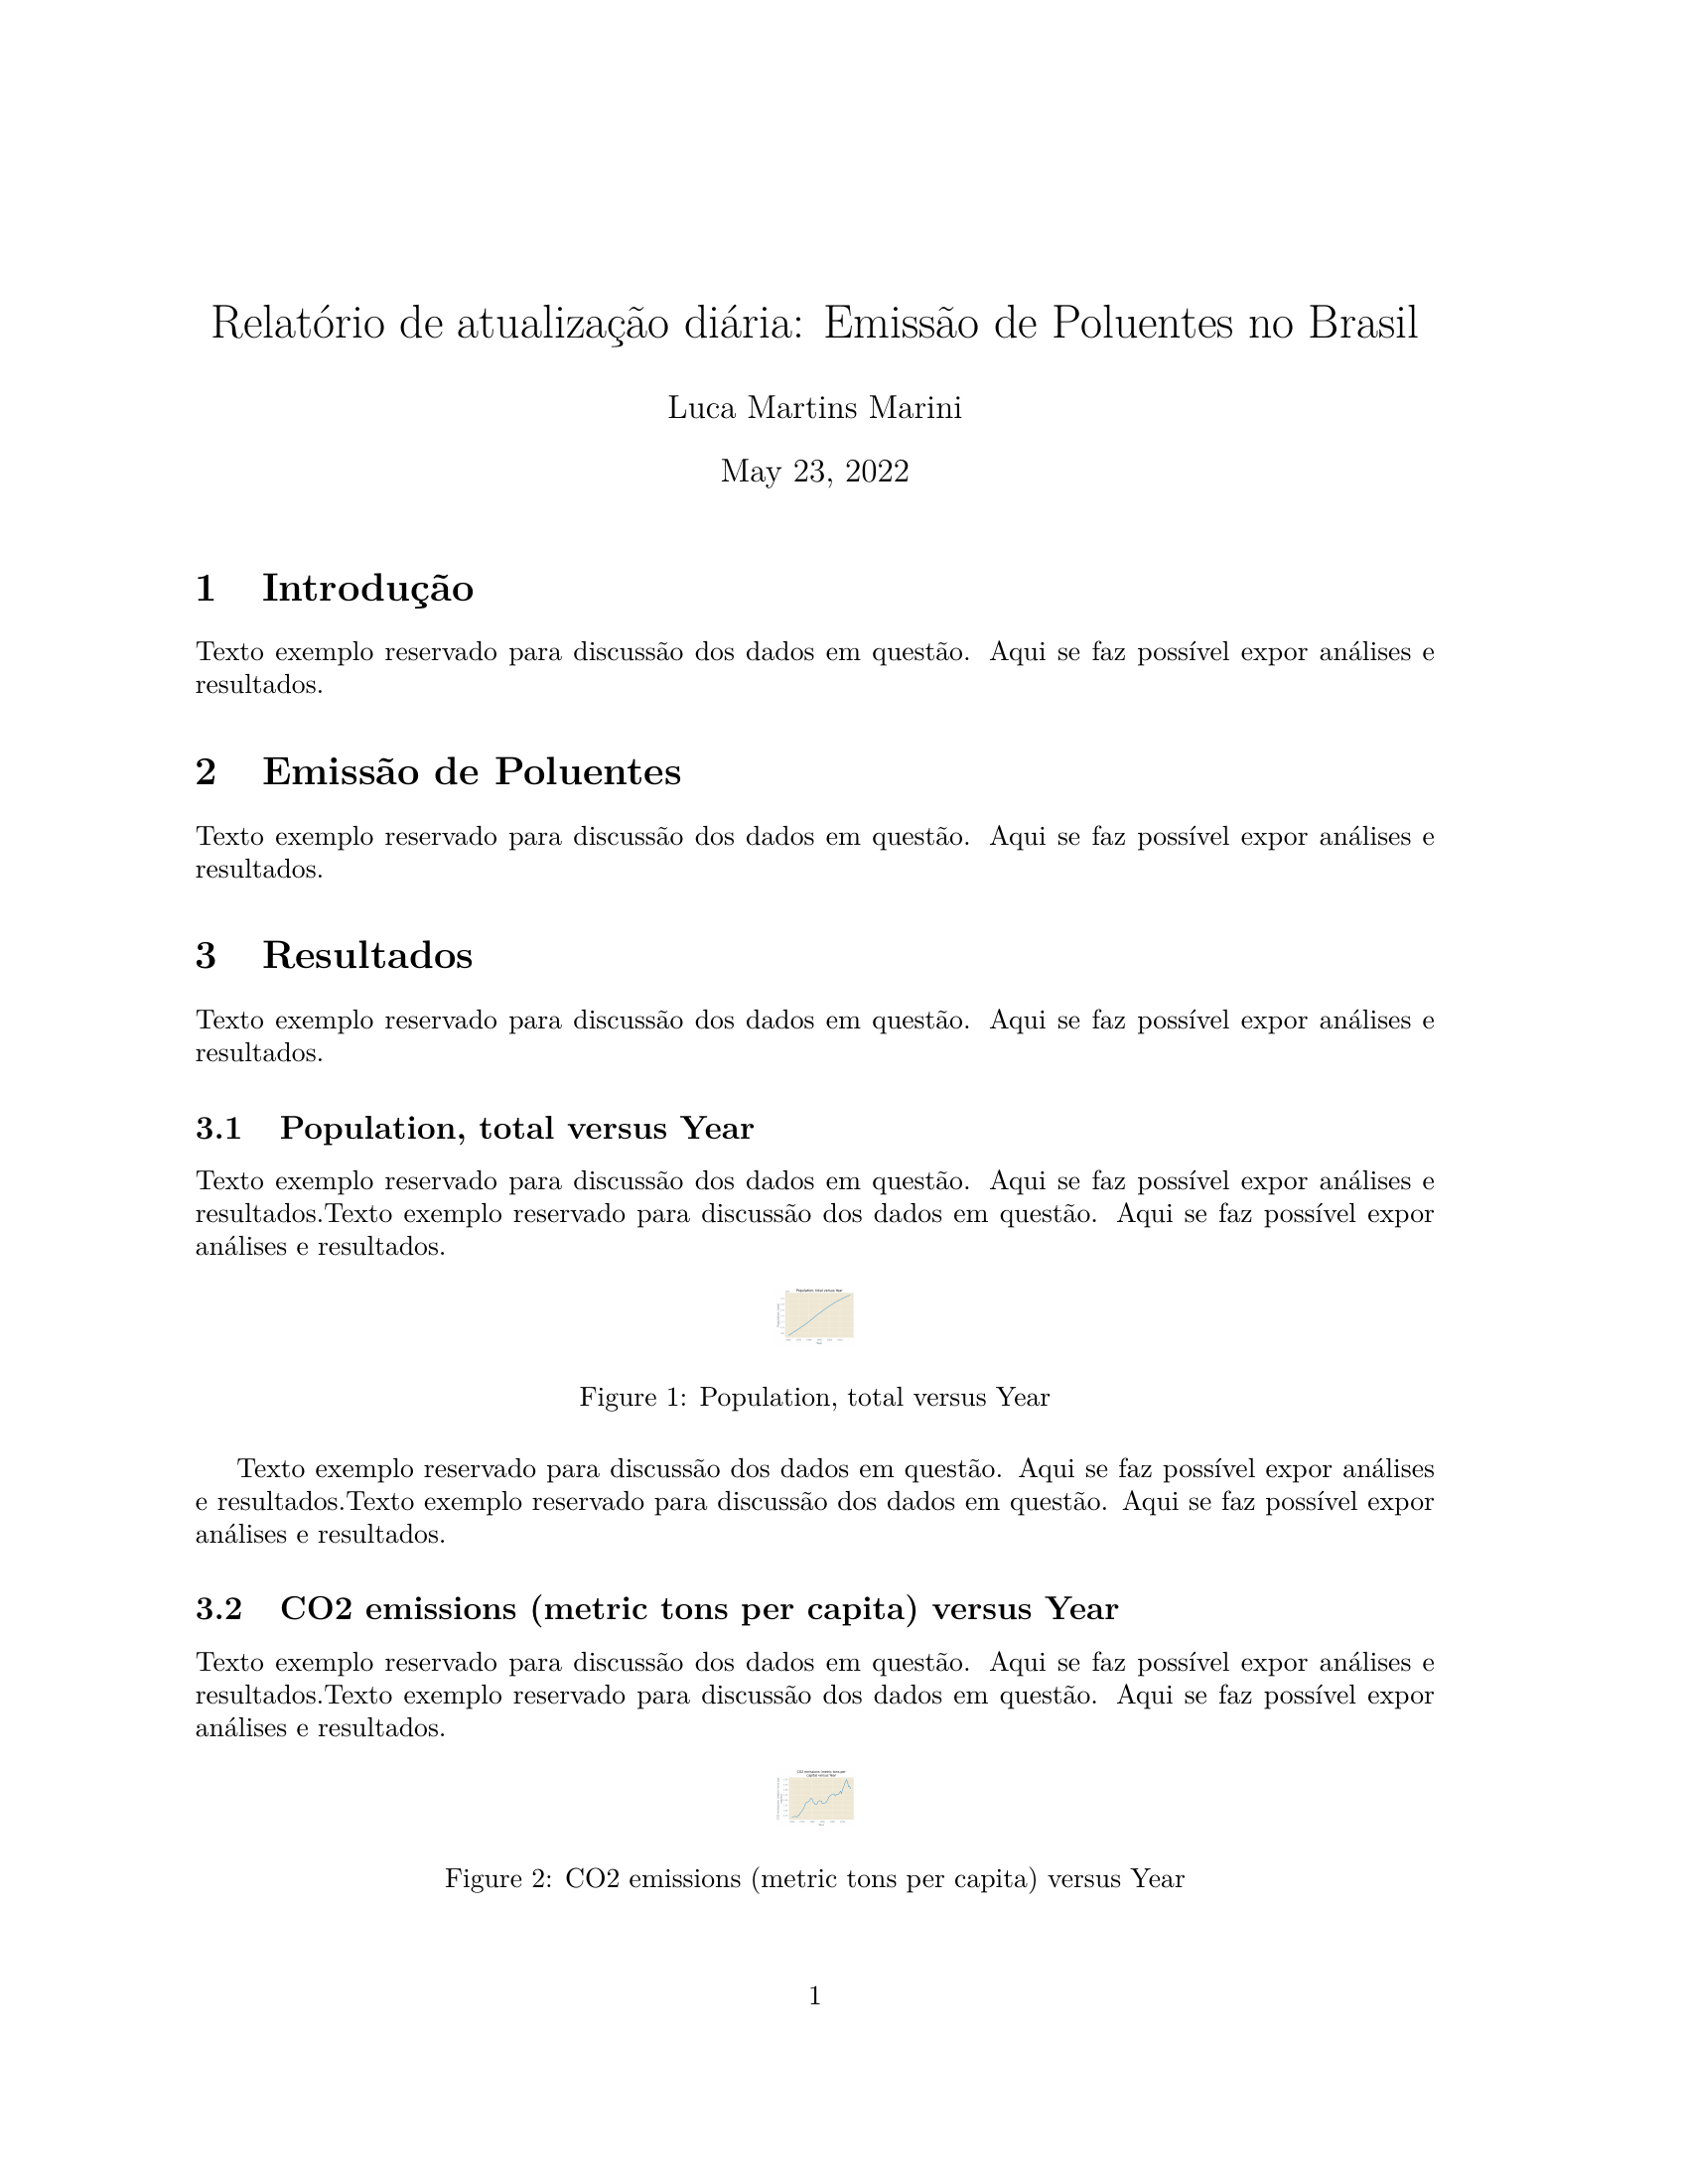

In [114]:
# Faz display do pdf gerado

images = convert_from_path("/content/drive/MyDrive/..Python_Codes/Projeto_Dashboard_Matriz_Energetica/Relatorio.pdf")
# for i, image in enumerate(images):    
#     fname = "image" + str(i) + ".png"
#     image.save(fname, "PNG")
#  Image(fname, width=595, height=842)

# preview da primeira página:
fname = "image"+str(images[0])+".png"
images[0].save(fname, "PNG")
Image(fname, width=595*1.5, height=842*1.5)


## **Envio automático de email**

In [115]:
############################################ Envia informação via gmail

import smtplib
import email.message
import email.mime.application
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

try:
  fromaddr = "email_from@gmail.com"
  toaddr = 'email_to@gmail.com'
  msg = MIMEMultipart()

  msg['From'] = fromaddr 
  msg['To'] = toaddr
  msg['Subject'] = "Report - Dashboard e Relatório de Emissão de Poluentes"

  body = """
Bom dia a todos, 
Estou enviando em anexo os últimos resultados da análise de emissão de poluentes no Brasil versus o crescimento da população.
Quaisquer dúvidas ou sugestões de análise posterior estarei a disposição através deste email.

Atenciosamente,
Luca Martins Marini
            """

  msg.attach(MIMEText(body, 'plain'))

  filename = 'Relatorio.pdf'

  attachment = open('/content/drive/MyDrive/..Python_Codes/Projeto_Dashboard_Matriz_Energetica/Relatorio.pdf','rb')


  part = MIMEBase('application', 'octet-stream')
  part.set_payload((attachment).read())
  encoders.encode_base64(part)
  part.add_header('Content-Disposition', "attachment; filename= %s" % filename)

  msg.attach(part)

  attachment.close()

  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls() # criptografa o email
  server.login(fromaddr, "password")
  text = msg.as_string()
  server.sendmail(fromaddr, toaddr, text)
  server.quit()
  print('\nEmail enviado com sucesso!')
except:
  print("\nErro ao enviar email")


Erro ao enviar email


## **Fim do código**

In [116]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 67.67 segundos
